##### Importation

In [1]:
from pandas_profiling import ProfileReport
import pandas as pd
import numpy as np
import seaborn as sns 
import tkinter
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('TkAgg')
%matplotlib inline

##### Fonction recheche outliers

In [ ]:
#Utilisation des quartiles pour retrouver les valeurs aberrantes.
#percentile est un concept de statistique qui permet de déterminer la position d’une valeur par rapport à un groupe donné
#Q1 = 25 percentile des données
#Q3 = 75 percentile des données
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25)) # Différence entre le Quartile supérieure et le Quartile inférieure
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr) # Cherche les valeurs supérieur à Q3 + 1.5*IQR 
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr) # Cherche les valeurs inférieur à Q1 - 1.5*IQR
    f = []
    for i in s:
        if i > upper_bound: #Si prix > Q3 valeurs abberantes
            f.append(i)
        elif i < lower_bound: #Si prix < Q2 valeurs abberantes
            f.append(i)
    sums = len(f) #Nombre de Outlier
    pros = len(f)/len(s)*100 # % de Outlier
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)

#### Donnée

##### Data customers

In [ ]:
customers = pd.read_csv('customers.csv')
#print(customers.shape)
#customers.head()

In [ ]:
#Profiling customers
#prof_customers = ProfileReport(customers)
#profile_customers  =  ProfileReport ( customers , title = "customers" )
#profile_customers

##### Data products

In [ ]:
products = pd.read_csv('products.csv')
#print(products.shape)
#products.head()

In [ ]:
#Profiling products
#prof_products = ProfileReport(products)
#profile_products  =  ProfileReport ( products , title = "products" )
#profile_products

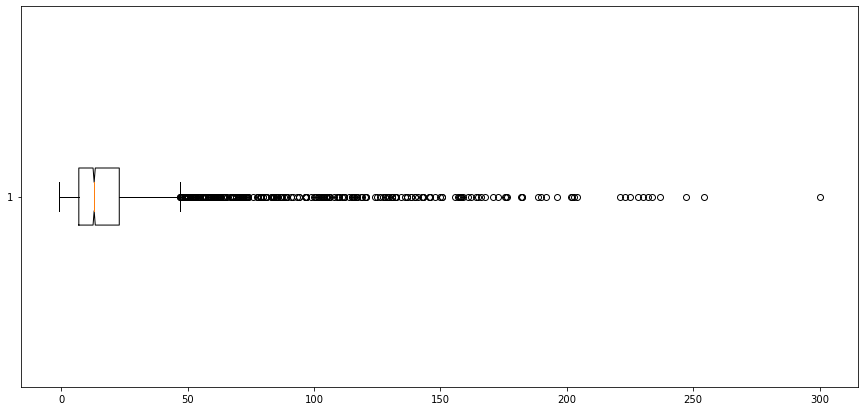

In [8]:
#Visualisation valeur aberrante sur price
figure = plt.figure(figsize = (15, 7))
plt.boxplot(products['price'],notch = True,vert=0)
plt.show()

In [11]:
#Information sur les outliers
outliers(products.price)

,sub,values
0,IQR,16.000000
1,Upper Bound,46.990000
2,Lower Bound,-17.010000
3,Sum outliers,302.000000
4,percentage outliers,9.187709


In [9]:
#List des outliers
#valeurs_aberrantes = (products.loc[products['price'] > 46.99])
#valeurs_aberrantes.sort_values(by=['price'], ascending=False)

In [44]:
products.sort_values(by=['price']) #Verification prix inférieure à 0

,id_prod,price,categ
2272,0_528,0.62,0
2355,0_202,0.62,0
370,0_120,0.66,0
1211,0_1844,0.77,0
1530,0_1620,0.80,0
...,...,...,...
2779,2_30,233.54,2
1436,2_167,236.99,2
394,2_158,247.22,2
724,2_76,254.44,2


In [11]:
products.drop(products.loc[products['id_prod']=='T_0'].index, inplace=True) #Supression ligne test

##### Data transactions

In [12]:
transactions = pd.read_csv('transactions.csv')
#print(transactions.shape)
#transactions.head()

In [13]:
#Profiling transactions
#prof_transactions = ProfileReport(transactions)
#profile_transactions  =  ProfileReport ( transactions , title = "transactions" )
#profile_transactions

Supression des lignes de test

In [14]:
transactions.drop(transactions.loc[transactions['id_prod']=='T_0'].index, inplace=True)

Visualisation des valeurs en doublon

In [15]:
df_double = transactions.groupby(['id_prod', 'client_id']).agg({'client_id':'count'})
df_double

client_id
id_prod client_id           
0_0     c_1004             1
        c_1011             4
        c_1020             3
        c_1037             4
        c_1052             2
...                      ...
2_97    c_4958             2
        c_5899             3
2_98    c_5967             1
2_99    c_5828             4
        c_7135             3

[307073 rows x 1 columns]

In [16]:
double = transactions[(transactions['id_prod']=='0_0') & (transactions['client_id']=='c_1052')]
double

,id_prod,date,session_id,client_id
275679,0_0,2023-01-05 14:27:50.296439,s_322405,c_1052
511318,0_0,2021-11-05 14:27:50.296439,s_115148,c_1052


In [17]:
transactions['date'] = pd.to_datetime(transactions['date']).dt.date #Garde uniquement l'année le mois et le jour

In [18]:
transactions['date'] = pd.to_datetime(transactions.date, format='%Y-%m-%d') #Convertir la colonne date en datetime

In [19]:
#Separe le mois et l'année
transactions['Year'] = transactions['date'].dt.year 
transactions['Month'] = transactions['date'].dt.month 
transactions['Day'] = transactions['date'].dt.day

#### Création data chiffre d'affaires

In [45]:
chiffre_daffaires = pd.merge(transactions, products, on  = "id_prod" ,how = 'left')
chiffre_daffaires.head()

,id_prod,date,session_id,client_id,Year,Month,Day,price,categ
0,0_1518,2022-05-20,s_211425,c_103,2022,5,20,4.18,0.0
1,1_251,2022-02-02,s_158752,c_8534,2022,2,2,15.99,1.0
2,0_1277,2022-06-18,s_225667,c_6714,2022,6,18,7.99,0.0
3,2_209,2021-06-24,s_52962,c_6941,2021,6,24,69.99,2.0
4,0_1509,2023-01-11,s_325227,c_4232,2023,1,11,4.99,0.0


In [21]:
#Profiling chiffre_daffaires
#prof_chiffre_daffaires = ProfileReport(chiffre_daffaires)
#profile_chiffre_daffaires =  ProfileReport ( chiffre_daffaires , title = "chiffre daffaires" )
#profile_chiffre_daffaires

In [46]:
#Visualisation des lignes où categ et price est null
nan_rows = chiffre_daffaires[(chiffre_daffaires['categ'].isnull()) & (chiffre_daffaires['price'].isnull())]
nan_rows

,id_prod,date,session_id,client_id,Year,Month,Day,price,categ
2633,0_2245,2022-09-23,s_272266,c_4746,2022,9,23,NaN,NaN
10103,0_2245,2022-07-23,s_242482,c_6713,2022,7,23,NaN,NaN
11723,0_2245,2022-12-03,s_306338,c_5108,2022,12,3,NaN,NaN
15670,0_2245,2021-08-16,s_76493,c_1391,2021,8,16,NaN,NaN
16372,0_2245,2022-07-16,s_239078,c_7954,2022,7,16,NaN,NaN
...,...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25,s_80395,c_131,2021,8,25,NaN,NaN
670484,0_2245,2022-03-06,s_175311,c_4167,2022,3,6,NaN,NaN
671088,0_2245,2022-05-16,s_209381,c_4453,2022,5,16,NaN,NaN
675480,0_2245,2022-02-11,s_163405,c_1098,2022,2,11,NaN,NaN


In [47]:
nan_rows.groupby('id_prod').size()

id_prod
0_2245    221
dtype: int64

In [48]:
chiffre_daffaires[(chiffre_daffaires['id_prod']=='0_2245')] #Fiche produit manquant dans la table des produits

,id_prod,date,session_id,client_id,Year,Month,Day,price,categ
2633,0_2245,2022-09-23,s_272266,c_4746,2022,9,23,NaN,NaN
10103,0_2245,2022-07-23,s_242482,c_6713,2022,7,23,NaN,NaN
11723,0_2245,2022-12-03,s_306338,c_5108,2022,12,3,NaN,NaN
15670,0_2245,2021-08-16,s_76493,c_1391,2021,8,16,NaN,NaN
16372,0_2245,2022-07-16,s_239078,c_7954,2022,7,16,NaN,NaN
...,...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25,s_80395,c_131,2021,8,25,NaN,NaN
670484,0_2245,2022-03-06,s_175311,c_4167,2022,3,6,NaN,NaN
671088,0_2245,2022-05-16,s_209381,c_4453,2022,5,16,NaN,NaN
675480,0_2245,2022-02-11,s_163405,c_1098,2022,2,11,NaN,NaN


Imputation moyenne

In [25]:
median = products['price'].median() #Calcul du prix median
chiffre_daffaires['price'].fillna(median, inplace=True)#Remplace le prix par le prix median
chiffre_daffaires['categ'].fillna(0.0, inplace=True) #Ajout du produit dans sa catégorie

#### Création data profil clients

In [26]:
profil_client = pd.merge(chiffre_daffaires, customers, on  = "client_id" ,how = 'left')
#profil_client.head()

In [27]:
#Profiling profil_client
#prof_profil_client = ProfileReport(profil_client)
#profile_profil_client =  ProfileReport ( profil_client , title = "profil clients" )
#profile_profil_client

In [28]:
#du principe que nous sommes en 2023
profil_client['birth'] = 2023 - profil_client['birth'] #Calcul de l'age des clients

In [29]:
profil_client.rename(columns={'birth':'Age'}, inplace=True) #renomme birth en age

In [30]:
profil_client['tranche_dage'] = pd.cut(profil_client['Age'], bins=[17, 29, 39, 49, 59, 100])

In [49]:
profil_client

,id_prod,date,session_id,client_id,Year,Month,Day,price,categ,sex,Age,tranche_dage
0,0_1518,2022-05-20,s_211425,c_103,2022,5,20,4.18,0.0,f,37,"(29, 39]"
1,1_251,2022-02-02,s_158752,c_8534,2022,2,2,15.99,1.0,m,35,"(29, 39]"
2,0_1277,2022-06-18,s_225667,c_6714,2022,6,18,7.99,0.0,f,55,"(49, 59]"
3,2_209,2021-06-24,s_52962,c_6941,2021,6,24,69.99,2.0,m,23,"(17, 29]"
4,0_1509,2023-01-11,s_325227,c_4232,2023,1,11,4.99,0.0,m,43,"(39, 49]"
...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15,s_150195,c_8489,2022,1,15,12.99,0.0,f,72,"(59, 100]"
679328,1_639,2022-03-19,s_181434,c_4370,2022,3,19,10.99,1.0,f,46,"(39, 49]"
679329,0_1425,2022-12-20,s_314704,c_304,2022,12,20,12.99,0.0,f,35,"(29, 39]"
679330,0_1994,2021-07-16,s_63204,c_2227,2021,7,16,4.98,0.0,m,37,"(29, 39]"


#### Suite analyse sur chiffre d'affaires Octobre 2021

In [50]:
octobre_2021 = chiffre_daffaires[(chiffre_daffaires['Year']== 2021) & (chiffre_daffaires['Month']== 10 )]
octobre_2021.head(10)

,id_prod,date,session_id,client_id,Year,Month,Day,price,categ
68,0_1409,2021-10-02,s_99013,c_5725,2021,10,2,4.99,0.0
71,0_1247,2021-10-03,s_99443,c_3394,2021,10,3,15.99,0.0
80,0_1272,2021-10-13,s_104207,c_8534,2021,10,13,17.01,0.0
86,0_1102,2021-10-24,s_109442,c_1609,2021,10,24,4.63,0.0
93,0_1079,2021-10-05,s_100557,c_7918,2021,10,5,5.99,0.0
101,0_1574,2021-10-06,s_100652,c_1609,2021,10,6,9.67,0.0
179,0_1340,2021-10-13,s_104247,c_6714,2021,10,13,14.76,0.0
216,0_1520,2021-10-15,s_105093,c_6893,2021,10,15,9.32,0.0
282,0_1627,2021-10-09,s_102192,c_4195,2021,10,9,3.99,0.0
295,0_1367,2021-10-08,s_101589,c_1746,2021,10,8,11.99,0.0


In [33]:
octobre_2021 = octobre_2021[['categ', 'Month', 'Year', 'Day']] #Selection des colonnes necessaires

In [34]:
octobre_2021.groupby('categ')['Day'].nunique().reset_index()

,categ,Day
0,0.0,31
1,1.0,5
2,2.0,31


In [35]:
octobre_2021_categ = chiffre_daffaires[(chiffre_daffaires['Year']== 2021) 
                                       & (chiffre_daffaires['Month']== 10 ) 
                                       & (chiffre_daffaires['categ']== 1.0 )]

In [36]:
octobre_2021_categ.groupby('Day').nunique() #Catégorie 1 manquant en quasi totalité sur Octobre 2021

,id_prod,date,session_id,client_id,Year,Month,price,categ
Day,,,,,,,,
1,188,1,271,246,1,1,124,1
28,186,1,252,236,1,1,111,1
29,183,1,258,240,1,1,112,1
30,195,1,259,248,1,1,132,1
31,187,1,257,246,1,1,115,1


##### Supression octobre 2021

In [37]:
drop_octobre_21 = chiffre_daffaires[(chiffre_daffaires['Year']== 2021) 
                                                 & (chiffre_daffaires['Month']== 10 )].index

In [38]:
chiffre_daffaires.drop(drop_octobre_21 , inplace=True)

In [39]:
octobre_2021 = chiffre_daffaires[(chiffre_daffaires['Year']== 2021) & (chiffre_daffaires['Month']== 10 )]
octobre_2021

,id_prod,date,session_id,client_id,Year,Month,Day,price,categ


Sauvegarde data vers csv

In [40]:
#profil_client.to_csv('profil_client.csv')

In [41]:
#chiffre_daffaires.to_csv('chiffre_daffaires.csv')